# Analysis of Subliminal Messaging's effect on Sentence Production
## 

In [16]:
import string

In [17]:
file = open("NRC-Emotion-Lexicon.txt")
txt = file.readline()
txt = file.readline()
word_dict = {} 
while txt:
    txt = txt.split( )
    if txt[0] in word_dict:
        word_dict[txt[0]][txt[1]] = int(txt[2])
    else:
        word_dict[txt[0]] = {txt[1]: int(txt[2])}
    txt = file.readline()

In [18]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']
prompts = ['First ', 'Second ', 'Third ', 'Fourth ', 'Fifth ']
scores = []
for prompt in prompts:
    print(prompt)
    response = open(prompt+"Prompt.txt")
    with open(prompt+'Prompt.txt', 'r', encoding='utf-16', errors='ignore') as f:
        text = f.readlines()
        reviewScores = {'anger':0, 'anticipation':0, 'disgust':0, 'fear':0, 'joy':0, 'negative':0, 'positive':0, 'sadness':0, 'surprise':0, 'trust':0}
        for i in range(len(text)):
            responseLine = text[i]
            words = responseLine.split( )
            for i in range(len(words)):
                curr = words[i].lower()
                curr = curr.translate(str.maketrans('', '', string.punctuation))
                for emotion in emotions:
                    if (words[i] in word_dict):
                            if (word_dict[words[i]][emotion] == 1):
                                reviewScores[emotion] = reviewScores.get(emotion) + 1        
        scores.append(reviewScores)
        print(reviewScores)

First 
{'anger': 10, 'anticipation': 29, 'disgust': 8, 'fear': 14, 'joy': 23, 'negative': 47, 'positive': 39, 'sadness': 18, 'surprise': 19, 'trust': 25}
Second 
{'anger': 26, 'anticipation': 55, 'disgust': 15, 'fear': 25, 'joy': 47, 'negative': 45, 'positive': 90, 'sadness': 15, 'surprise': 27, 'trust': 58}
Third 
{'anger': 14, 'anticipation': 38, 'disgust': 13, 'fear': 14, 'joy': 23, 'negative': 33, 'positive': 52, 'sadness': 19, 'surprise': 15, 'trust': 33}
Fourth 
{'anger': 13, 'anticipation': 34, 'disgust': 12, 'fear': 22, 'joy': 9, 'negative': 43, 'positive': 35, 'sadness': 17, 'surprise': 13, 'trust': 14}
Fifth 
{'anger': 13, 'anticipation': 30, 'disgust': 7, 'fear': 17, 'joy': 25, 'negative': 35, 'positive': 64, 'sadness': 19, 'surprise': 11, 'trust': 27}


In [19]:
print(scores[1]['anger'])
positiveGroup = []
negativeGroup = []
controlGroup = scores[3].values()
variables = scores[0].keys()
print(scores[0].keys())
for key in variables:
    positiveGroup.append(scores[1][key]+scores[4][key])
    negativeGroup.append(scores[0][key]+scores[2][key])
    
#Normalize
posNorm = [(x / sum(positiveGroup))*100 for x in positiveGroup]
negNorm = [(x / sum(negativeGroup))*100 for x in negativeGroup]
conNorm = [(x / sum(controlGroup))*100 for x in controlGroup]
print(posNorm)

26
dict_keys(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust'])
[5.990783410138248, 13.056835637480798, 3.3794162826420893, 6.451612903225806, 11.059907834101383, 12.288786482334869, 23.655913978494624, 5.22273425499232, 5.837173579109063, 13.056835637480798]


In [20]:
import pandas as pd
  
data = {'Positive': positiveGroup,
        'Negative': negativeGroup,
        'Control': controlGroup}

# Create the pandas DataFrame
df = pd.DataFrame(data, index=variables)
  
# print dataframe.
df

,Positive,Negative,Control
anger,39,24,13
anticipation,85,67,34
disgust,22,21,12
fear,42,28,22
joy,72,46,9
negative,80,80,43
positive,154,91,35
sadness,34,37,17
surprise,38,34,13
trust,85,58,14


In [21]:
import pandas as pd
  
data = {'Positive': posNorm,
        'Negative': negNorm,
        'Control': conNorm}

# Create the pandas DataFrame
df = pd.DataFrame(data, index=variables)

# print dataframe.
df

,Positive,Negative,Control
anger,5.990783,4.938272,6.132075
anticipation,13.056836,13.786008,16.037736
disgust,3.379416,4.320988,5.660377
fear,6.451613,5.761317,10.377358
joy,11.059908,9.465021,4.245283
negative,12.288786,16.460905,20.283019
positive,23.655914,18.724280,16.509434
sadness,5.222734,7.613169,8.018868
surprise,5.837174,6.995885,6.132075
trust,13.056836,11.934156,6.603774


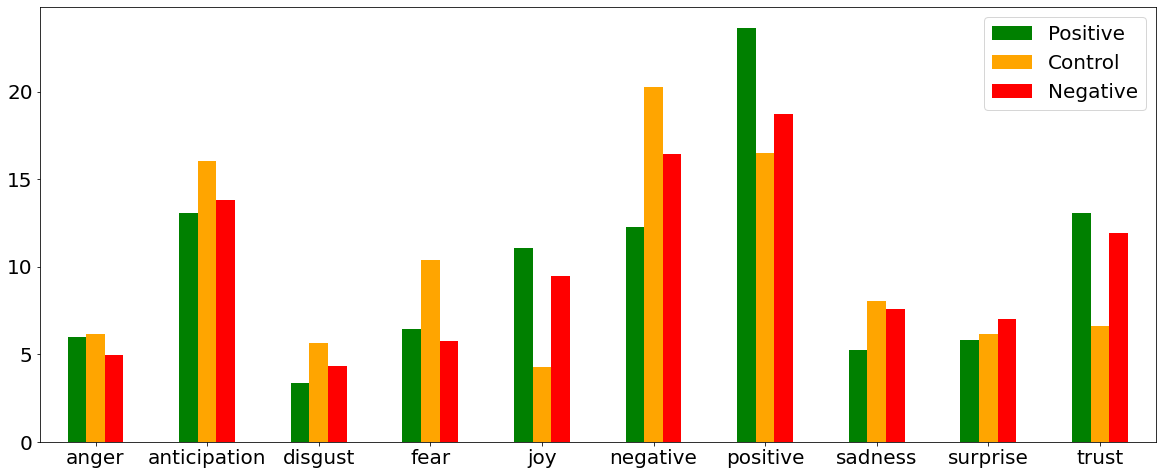

In [22]:
df =  pd.DataFrame({'Positive': posNorm,'Control':conNorm,'Negative':negNorm}, index=variables)
ax = df.plot.bar(rot=0,figsize=(20, 8), color = {'Positive': 'green','Control':'orange','Negative': 'red'}, fontsize=20)
ax.legend(fontsize = 20)

In [23]:
posCompile = [0]*3
conCompile = [0]*3
negCompile = [0]*3
labels = ['Positive', 'Negative', 'Arousal']

neg = [0,2,3,5,7]
pos = [4,6,9]

arou = [1,8]
for i in range(len(posNorm)):
    if i in pos:
        posCompile[0] += posCompile[0] + posNorm[i]
        conCompile[0] += conCompile[0] + conNorm[i]
        negCompile[0] += negCompile[0] + negNorm[i]
    elif i in neg:
        posCompile[1] += posCompile[1] + posNorm[i]
        conCompile[1] += conCompile[1] + conNorm[i]
        negCompile[1] += negCompile[1] + negNorm[i]
    else:
        posCompile[2] += posCompile[2] + posNorm[i]
        conCompile[2] += conCompile[2] + conNorm[i]
        negCompile[2] += negCompile[2] + negNorm[i]


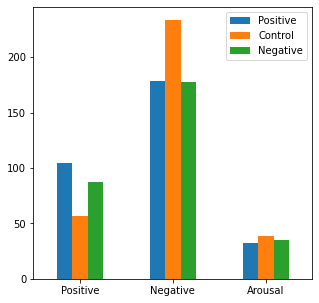

In [24]:
df =  pd.DataFrame({'Positive': posCompile,'Control':conCompile,'Negative':negCompile}, index=labels)
ax = df.plot.bar(rot=0,figsize=(5, 5), fontsize=10)
ax.legend(fontsize = 10)